# 数据管道

In [1]:
import os
import tensorflow as tf
import numpy as np 
from sklearn import datasets
import pandas as pd
from matplotlib import pyplot as plt 

tf.__version__

'2.1.0'

## 构建数据管道

### 从Numpy array构建数据管道

In [2]:
iris = datasets.load_iris()

print(iris["DESCR"])
print()
print(iris['filename'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [3]:
print(f"iris type: {type(iris)}")
print()
print(f"keys : {iris.keys()}")
print()
print(f"feature names: {iris['feature_names']}")
print()
print(f"target names: {iris['target_names']}")
print()
print(f"target shape: {iris['target'].shape}")
print()
print(f"target : {iris['target'][:5]}")
print()
print(f"data shape: {iris['data'].shape}")
print()
print(f"data :\n{iris['data'][:5]}")
print()

iris type: <class 'sklearn.utils.Bunch'>

keys : dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

target names: ['setosa' 'versicolor' 'virginica']

target shape: (150,)

target : [0 0 0 0 0]

data shape: (150, 4)

data :
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]



In [4]:
ds1 = tf.data.Dataset.from_tensor_slices((iris["data"], iris["target"]))
for features, label in ds1.take(5):
    print(features, "||", label)

tf.Tensor([5.1 3.5 1.4 0.2], shape=(4,), dtype=float64) || tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor([4.9 3.  1.4 0.2], shape=(4,), dtype=float64) || tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor([4.7 3.2 1.3 0.2], shape=(4,), dtype=float64) || tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor([4.6 3.1 1.5 0.2], shape=(4,), dtype=float64) || tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor([5.  3.6 1.4 0.2], shape=(4,), dtype=float64) || tf.Tensor(0, shape=(), dtype=int64)


### 从 Pandas DataFrame构建数据管道

In [5]:
dfiris = pd.DataFrame(iris["data"], columns=iris.feature_names)
ds2 = tf.data.Dataset.from_tensor_slices((dfiris.to_dict("list"), iris["target"]))

for features, label in ds2.take(3):
    print(features, "||", label)

{'sepal length (cm)': <tf.Tensor: shape=(), dtype=float32, numpy=5.1>, 'sepal width (cm)': <tf.Tensor: shape=(), dtype=float32, numpy=3.5>, 'petal length (cm)': <tf.Tensor: shape=(), dtype=float32, numpy=1.4>, 'petal width (cm)': <tf.Tensor: shape=(), dtype=float32, numpy=0.2>} || tf.Tensor(0, shape=(), dtype=int64)
{'sepal length (cm)': <tf.Tensor: shape=(), dtype=float32, numpy=4.9>, 'sepal width (cm)': <tf.Tensor: shape=(), dtype=float32, numpy=3.0>, 'petal length (cm)': <tf.Tensor: shape=(), dtype=float32, numpy=1.4>, 'petal width (cm)': <tf.Tensor: shape=(), dtype=float32, numpy=0.2>} || tf.Tensor(0, shape=(), dtype=int64)
{'sepal length (cm)': <tf.Tensor: shape=(), dtype=float32, numpy=4.7>, 'sepal width (cm)': <tf.Tensor: shape=(), dtype=float32, numpy=3.2>, 'petal length (cm)': <tf.Tensor: shape=(), dtype=float32, numpy=1.3>, 'petal width (cm)': <tf.Tensor: shape=(), dtype=float32, numpy=0.2>} || tf.Tensor(0, shape=(), dtype=int64)


### 从Python generator构建数据管道

In [6]:
# 定义一个从文件中读取图片的generator
image_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1.0/255).flow_from_directory(
                        "/home/sq/data/eat_tensorflow2_in_30_days/cifar2/test/",
                        target_size=(32, 32),
                        batch_size=20,
                        class_mode='binary')

classdict = image_generator.class_indices
print(classdict)

def generator():
    for features, label in image_generator:
        yield (features, label)

ds3 = tf.data.Dataset.from_generator(generator, output_types=(tf.float32, tf.int32))

Found 2000 images belonging to 2 classes.
{'airplane': 0, 'automobile': 1}


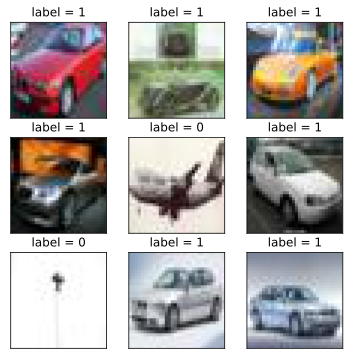

In [7]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

plt.figure(figsize=(6, 6)) 

for i, (img, label) in enumerate(ds3.unbatch().take(9)):
    ax=plt.subplot(3, 3, i + 1)
    ax.imshow(img.numpy())
    ax.set_title("label = %d" % label)
    ax.set_xticks([])
    ax.set_yticks([]) 

plt.show()

### 从csv文件构建数据管道

In [8]:
# 从csv文件构建数据管道
ds4 = tf.data.experimental.make_csv_dataset(
      file_pattern = [
          "/home/sq/data/eat_tensorflow2_in_30_days/titanic/train.csv",
          "/home/sq/data/eat_tensorflow2_in_30_days/titanic/test.csv",
      ],
      batch_size=3, 
      label_name="Survived",
      na_value="",
      num_epochs=1,
      ignore_errors=True)

for data, label in ds4.take(2):
    print(label)
    print()
    print(data)
    print()

tf.Tensor([0 1 0], shape=(3,), dtype=int32)

OrderedDict([('PassengerId', <tf.Tensor: shape=(3,), dtype=int32, numpy=array([ 30, 292,  55], dtype=int32)>), ('Pclass', <tf.Tensor: shape=(3,), dtype=int32, numpy=array([3, 1, 1], dtype=int32)>), ('Name', <tf.Tensor: shape=(3,), dtype=string, numpy=
array([b'Todoroff, Mr. Lalio', b'Bishop, Mrs. Dickinson H (Helen Walton)',
       b'Ostby, Mr. Engelhart Cornelius'], dtype=object)>), ('Sex', <tf.Tensor: shape=(3,), dtype=string, numpy=array([b'male', b'female', b'male'], dtype=object)>), ('Age', <tf.Tensor: shape=(3,), dtype=float32, numpy=array([ 0., 19., 65.], dtype=float32)>), ('SibSp', <tf.Tensor: shape=(3,), dtype=int32, numpy=array([0, 1, 0], dtype=int32)>), ('Parch', <tf.Tensor: shape=(3,), dtype=int32, numpy=array([0, 0, 1], dtype=int32)>), ('Ticket', <tf.Tensor: shape=(3,), dtype=string, numpy=array([b'349216', b'11967', b'113509'], dtype=object)>), ('Fare', <tf.Tensor: shape=(3,), dtype=float32, numpy=array([ 7.8958, 91.0792, 61.97

### 从文本文件构建数据管道

In [9]:
# 从文本文件构建数据管道
ds5 = tf.data.TextLineDataset(
    filenames = [
          "/home/sq/data/eat_tensorflow2_in_30_days/titanic/train.csv",
          "/home/sq/data/eat_tensorflow2_in_30_days/titanic/test.csv",
    ]
    ).skip(1) #略去第一行header

for line in ds5.take(5):
    print(line)

tf.Tensor(b'493,0,1,"Molson, Mr. Harry Markland",male,55.0,0,0,113787,30.5,C30,S', shape=(), dtype=string)
tf.Tensor(b'53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,D33,C', shape=(), dtype=string)
tf.Tensor(b'388,1,2,"Buss, Miss. Kate",female,36.0,0,0,27849,13.0,,S', shape=(), dtype=string)
tf.Tensor(b'192,0,2,"Carbines, Mr. William",male,19.0,0,0,28424,13.0,,S', shape=(), dtype=string)
tf.Tensor(b'687,0,3,"Panula, Mr. Jaako Arnold",male,14.0,4,1,3101295,39.6875,,S', shape=(), dtype=string)


### 从文件路径构建数据管道

In [10]:
ds6 = tf.data.Dataset.list_files("/home/sq/data/eat_tensorflow2_in_30_days/cifar2/train/*/*.jpg")
for file in ds6.take(5):
    print(file)

tf.Tensor(b'/home/sq/data/eat_tensorflow2_in_30_days/cifar2/train/automobile/3056.jpg', shape=(), dtype=string)
tf.Tensor(b'/home/sq/data/eat_tensorflow2_in_30_days/cifar2/train/airplane/965.jpg', shape=(), dtype=string)
tf.Tensor(b'/home/sq/data/eat_tensorflow2_in_30_days/cifar2/train/airplane/438.jpg', shape=(), dtype=string)
tf.Tensor(b'/home/sq/data/eat_tensorflow2_in_30_days/cifar2/train/automobile/2743.jpg', shape=(), dtype=string)
tf.Tensor(b'/home/sq/data/eat_tensorflow2_in_30_days/cifar2/train/automobile/4869.jpg', shape=(), dtype=string)


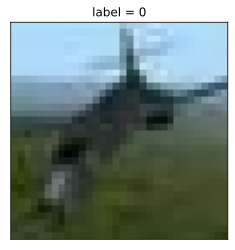

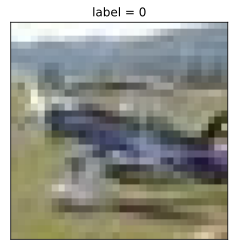

In [11]:
def load_image(img_path,size = (32,32)):
    label = 1 if tf.strings.regex_full_match(img_path,".*/automobile/.*") else 0
    img = tf.io.read_file(img_path)
    img = tf.image.decode_jpeg(img) #注意此处为jpeg格式
    img = tf.image.resize(img,size)
    return(img,label)

%matplotlib inline
%config InlineBackend.figure_format = 'svg'
for i,(img,label) in enumerate(ds6.map(load_image).take(2)):
    plt.figure(i)
    plt.imshow((img/255.0).numpy())
    plt.title("label = %d"%label)
    plt.xticks([])
    plt.yticks([])

### 从 tf records文件 构建数据管道

In [12]:
# inpath：原始数据路径 outpath:TFRecord文件输出路径
def create_tfrecords(inpath, outpath): 
    writer = tf.io.TFRecordWriter(outpath)
    dirs = os.listdir(inpath)
    for index, name in enumerate(dirs):
        class_path = inpath + "/" + name + "/"
        for img_name in os.listdir(class_path):
            img_path = class_path + img_name
            img = tf.io.read_file(img_path)
            #img = tf.image.decode_image(img)
            #img = tf.image.encode_jpeg(img) #统一成jpeg格式压缩
            example = tf.train.Example(
               features=tf.train.Features(feature={
                    'label': tf.train.Feature(int64_list=tf.train.Int64List(value=[index])),
                    'img_raw': tf.train.Feature(bytes_list=tf.train.BytesList(value=[img.numpy()]))
               }))
            writer.write(example.SerializeToString())
    writer.close()

path_in = "/home/sq/data/eat_tensorflow2_in_30_days/cifar2/test"
path_out = "/home/sq/data/eat_tensorflow2_in_30_days/cifar2/cifar2_test.tfrecords"
create_tfrecords(path_in, path_out)

In [15]:
def parse_example(proto):
    description ={ 'img_raw' : tf.io.FixedLenFeature([], tf.string),
                   'label': tf.io.FixedLenFeature([], tf.int64)} 
    example = tf.io.parse_single_example(proto, description)
    img = tf.image.decode_jpeg(example["img_raw"])   #注意此处为jpeg格式
    img = tf.image.resize(img, (32,32))
    label = example["label"]
    return(img,label)

ds7 = tf.data.TFRecordDataset(path_out).map(parse_example).shuffle(3000)


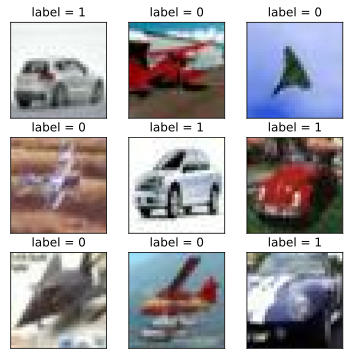

In [16]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
plt.figure(figsize=(6,6)) 
for i,(img,label) in enumerate(ds7.take(9)):
    ax=plt.subplot(3,3,i+1)
    ax.imshow((img/255.0).numpy())
    ax.set_title("label = %d"%label)
    ax.set_xticks([])
    ax.set_yticks([]) 
plt.show()

## 数据转换方法

Dataset数据结构应用非常灵活，它本质上是一个Sequece序列，其中每个元素可以是各种类型，例如可以是张量，列表，字典，也可以是Dataset。

Dataset包含了如下丰富的数据转换功能：
- map: 将转换函数映射到数据集每一个元素；
- flat_map: 将转换函数映射到数据集的每一个元素，并将嵌套的Dataset压平；
- interleave: 效果类似flat_map,但可以将不同来源的数据夹在一起；
- filter: 过滤掉某些元素；
- zip: 将两个长度相同的Dataset横向铰合；
- concatenate: 将两个Dataset纵向连接；
- reduce: 执行归并操作；
- batch : 构建批次，每次放一个批次。比原始数据增加一个维度。 其逆操作为unbatch；
- padded_batch: 构建批次，类似batch, 但可以填充到相同的形状；
- window :构建滑动窗口，返回Dataset of Dataset；
- shuffle: 数据顺序洗牌；
- repeat: 重复数据若干次，不带参数时，重复无数次；
- shard: 采样，从某个位置开始隔固定距离采样一个元素；
- take: 采样，从开始位置取前几个元素；